The purpose of this project is to explore the relationship between cryptocurrency valuations and US stock market trends using Python. Libraries and packages such as Pandas, NumPy, matplotlib, Seaborn, and more will be used to scrape data and/or access via API, to clean and analyze this data, and to visualize the results. I expect to find a negative linear correlation and potentially a cause-and-effect relationship wherein stock market trends influence the value of cryptocurrencies.

Basic Goals / Outline:
- Get historical crypto & stock data
- Perform any necessary cleaning
- Conduct analysis, determine correlation and relationship
- Plot graphs and generate dynamic visualizations

In [196]:
# @title Get Data
import pandas as pd
import numpy as np
import requests
import yfinance as yf
from google.colab import files

# step one is to gather relevant data from multiple sources. Will need APIs + downloadable data

# get_crypto retieves current (date & time) cryptocurrency valuation in USD. Historical data will also be needed.

# Users will need to have their own CoinAPI key.
key = 'INSERT CoinAPI KEY HERE'
def get_crypto(coins):
  base_url = 'https://rest.coinapi.io/v1/exchangerate/{}/{}'
  headers = {
      "X-CoinAPI-Key": key
    }
  coin_data = {}
  for coin in coins:
    url = base_url.format(coin, 'USD')
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
      coin_data[coin] = response.json()
    else:
      print(f'Failed to retrieve data for {coin}. Status code {response.status_code}')
  return coin_data

cryptocurrencies = ['BTC', 'ETH', 'XRP', 'LTC']

crypto_data = get_crypto(cryptocurrencies)
#print(crypto_data['ETH'])
#print("Current Etheruem price (USD): ", crypto_data['ETH']['rate'])


def fetch_ohlcv(coin, period, start_date):
    #"https://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_ETH_BTC/history?period_id=1MTH&time_start=2023-03-01T00:00:00"
    base_url = "https://rest.coinapi.io/v1/ohlcv/{}/history?period_id={}&time_start={}"
    headers = { "X-CoinAPI-Key": key }
    start_time = f"{start_date}T11:59:00"
    url = base_url.format(coin, period, start_time)
    response = requests.get(url, headers=headers)

    # Check if the response is successful
    if response.status_code == 200:
        if response.content:
            return response.json()
        else:
            print("Response is empty.")
            return None
    else:
        # Handle other HTTP status codes
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

# get_stocks gets stock data from Yahoo Finance during the specified interval
# needs modified to return the appropriate values depending on use. May need modified to return in different format as well

# the below get_stocks can be used to get any stock provided ticker and period. Need to ensu it can get current (live) price, but can't test that over the weekend outside of trading hours
def get_stocks(symbol, period):
  print(symbol)
  symbol = symbol.upper()
  stock = yf.download(tickers=f'{symbol}', period=f'{period}', interval='1d')
  return stock['Close'][0]

# the following creates a list (indicator_stocks_current) which contains current prices of the S&P500, DOW Jones, NASDAQ, and Russell 2000 in that order
sp500_current = get_stocks('^GSPC', 1)
dow_current = get_stocks('^DJI', 1)
nasdaq_current = get_stocks('^IXIC', 1)
russell_current = get_stocks('^RUT', 1)
indicator_stocks_current = [sp500_current, dow_current, nasdaq_current, russell_current]
#print(indicator_stocks_current)

# get_crypto_historical takes in a list of csv files and returns a dictionary with key [cryptoName] and value [corresponding df]
def get_crypto_historical(files):
    dfs_dict = {}  # to store dfs
    for csv in files:
        df_name = csv.split('.')[0][5:]  # get the name before '.csv' and after 'coin_'
        dfs_dict[df_name] = pd.read_csv(csv)
    return dfs_dict

# crypto_historical_list is a list of csv files which contain:
# SNo Name Symbol Date High Low Open Close Volume & Marketcap for several coins dating back to 2013-04-29
crypto_historical_list = ['coin_Bitcoin.csv', 'coin_Ethereum.csv']
dfs_dict = get_crypto_historical(crypto_historical_list)

def get_stocks_historical(start_date='2013-04-29', end_date='2021-07-06', period='10y'):
    sp500 = yf.download(tickers='^GSPC', start=start_date, end=end_date, interval='1d') # S&P 500
    dow = yf.download(tickers='^DJI', start=start_date, end=end_date, interval='1d') # Dow Jones Industrial Average
    nasdaq = yf.download(tickers='^IXIC', start=start_date, end=end_date, interval='1d') # NASDAQ
    russell = yf.download(tickers='^RUT', start=start_date, end=end_date, interval='1d') # Russell 2000

    # Create a list of market index dataframes
    indicator_stocks = [sp500, dow, nasdaq, russell]

    # extract possibly relevant columns and concatenate the dataframes
    df = pd.concat([df[['Open', 'High', 'Low',
                        'Close', 'Adj Close', 'Volume']].add_prefix(f'{ticker}_') for df, ticker in zip(indicator_stocks,
                         ['^GSPC', '^DJI', '^IXIC', '^RUT'])], axis=1)

    return df

stocks_historical = get_stocks_historical()

#print(crypto_data['BTC'])

^GSPC
[*********************100%%**********************]  1 of 1 completed
^DJI
[*********************100%%**********************]  1 of 1 completed
^IXIC
[*********************100%%**********************]  1 of 1 completed
^RUT
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [197]:
# @title Get Data pt. 2

stocks_historical_df = stocks_historical.reset_index()
stocks_current_list = indicator_stocks_current
crypto_historical_dict = dfs_dict
crypto_current_dict = crypto_data

btc_df = pd.read_csv('coin_Bitcoin.csv')
eth_df = pd.read_csv('coin_Ethereum.csv')

In [198]:
# @title Format Crypto dfs

btc_old_cols = btc_df.columns.tolist()
btc_cols = ['SNo', 'BTC_Name', 'BTC_Symbol', 'Date', 'BTC_High', 'BTC_Low', 'BTC_Open', 'BTC_Close', 'BTC_Volume', 'BTC_Marketcap']
btc_df.columns = btc_cols

eth_old_cols = eth_df.columns.tolist()
eth_cols = ['SNo', 'ETH_Name', 'ETH_Symbol', 'Date', 'ETH_High', 'ETH_Low', 'ETH_Open', 'ETH_Close', 'ETH_Volume', 'ETH_Marketcap']
eth_df.columns = eth_cols

btc_df = btc_df.dropna()
btc_df = btc_df.drop_duplicates(subset='Date')

eth_df = eth_df.dropna()
eth_df = eth_df.drop_duplicates(subset='Date')

# Note that eth and btc have different lens. This is bc Ethereum launched July of 2015 and by btc_df goes back to 2015.
# This is fine, I will simply outer join on date and backfill appropriately
display(eth_df.head(3))
display(btc_df.head(3))

,SNo,ETH_Name,ETH_Symbol,Date,ETH_High,ETH_Low,ETH_Open,ETH_Close,ETH_Volume,ETH_Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07


,SNo,BTC_Name,BTC_Symbol,Date,BTC_High,BTC_Low,BTC_Open,BTC_Close,BTC_Volume,BTC_Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000,116.989998,0.0,1.298955e+09


In [199]:
# @title Format Historical Stocks & Crypto Date Columns to Prepare for Join

# Convert 'Date' column in btc_df and eth_df to string and remove the last 9 characters
btc_df.loc[:, 'Date'] = btc_df['Date'].str.slice(stop=-9)
eth_df.loc[:, 'Date'] = eth_df['Date'].str.slice(stop=-9)

# Convert 'Date' column in stocks_historical_df to string in the format 'YYYY-MM-DD'
stocks_historical_df.loc[:, 'Date'] = stocks_historical_df['Date'].dt.strftime('%Y-%m-%d')

<ipython-input-199-c7dd4fa2e60a>:8: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



The decision was made to work specifically with Bitcoin and Ethereum since they have the greatest market volumes and valuations by a wide margin.

length of stocks historical : 2061

length of btc historical : 2991

This is due to the fact that stocks are not traded 24/7/365 the way crypto is. To resolve this, outer join will be used and nulls forward filled. This method preserves accuracy and integrity of data.


In [200]:
# @title Verify that btc_df['Date'], eth_df['Date'], & stocks_historical_df['Date] are of the same format
def verify_date_column(df, column_name='Date'):
    date_series = df[column_name]

    # verify all elements have the same format
    formats_set = set(date_series.apply(lambda x: str(type(x))))

    # verify all elements have the same length
    lengths_set = set(date_series.apply(lambda x: len(str(x))))

    return formats_set, lengths_set

btc_formats, btc_lengths = verify_date_column(btc_df)
eth_formats, eth_lengths = verify_date_column(eth_df)
stocks_formats, stocks_lengths = verify_date_column(stocks_historical_df)

print("BTC Formats:", btc_formats)
print("BTC Lengths:", btc_lengths)

print("ETH Formats:", eth_formats)
print("ETH Lengths:", eth_lengths)

print("Stocks Formats:", stocks_formats)
print("Stocks Lengths:", stocks_lengths)


BTC Formats: {"<class 'str'>"}
BTC Lengths: {10}
ETH Formats: {"<class 'str'>"}
ETH Lengths: {10}
Stocks Formats: {"<class 'str'>"}
Stocks Lengths: {10}


In [201]:
# @title Merge Datasets and Backfill Stock Prices for Non-Trading Days

merged_df = btc_df.merge(eth_df, on='Date', how='outer')
merged_df = merged_df.merge(stocks_historical_df, on='Date', how='outer')
# this next commented out section checks to ensure that nulls in merged_df only appear where they are expected to
'''
df = merged_df

columns_with_nulls = df.columns[df.isnull().any()].tolist()

# Display the list of columns with null values
print("Columns with null values:", columns_with_nulls)

# Display the indices (column numbers) of columns with null values
for col in columns_with_nulls:
    indices_with_nulls = df.index[df[col].isnull()].tolist()
    print(f"Indices with nulls in column '{col}': {indices_with_nulls}")
'''
# now we will forward fill nulls, effectively setting stock prices on non-trading days to the most recent close
merged_df.fillna(method='ffill', inplace=True)

# to check that it worked:
#display(merged_df.head(20))

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# set Date as index
merged_df.set_index('Date', inplace=True)
merged_df_cols = merged_df.columns.tolist()
#print(merged_df_cols)

Data has now been cleaned, transformed, and prepared for analysis.

Notes:

- Since Ethereum did not launch until July 2015, the first two years of merged_df contain NaNs under Ethereum columns. The decision was made not to backfill as this would violate the integrity of the data unnecessarily. Instead, when performing column operations and generating statistical summaries, eth_df will be used to avoid NaNs obscuring results.
- Adjusted Close is used rather than Close for market indices becuase it more accurately reflects the true valuation and performance of the market.

In [202]:
# @title Write merged_df and eth_df to .csv

merged_df.to_csv('merged_data.csv', index=True)

eth_df.to_csv('eth_data.csv', index=True)

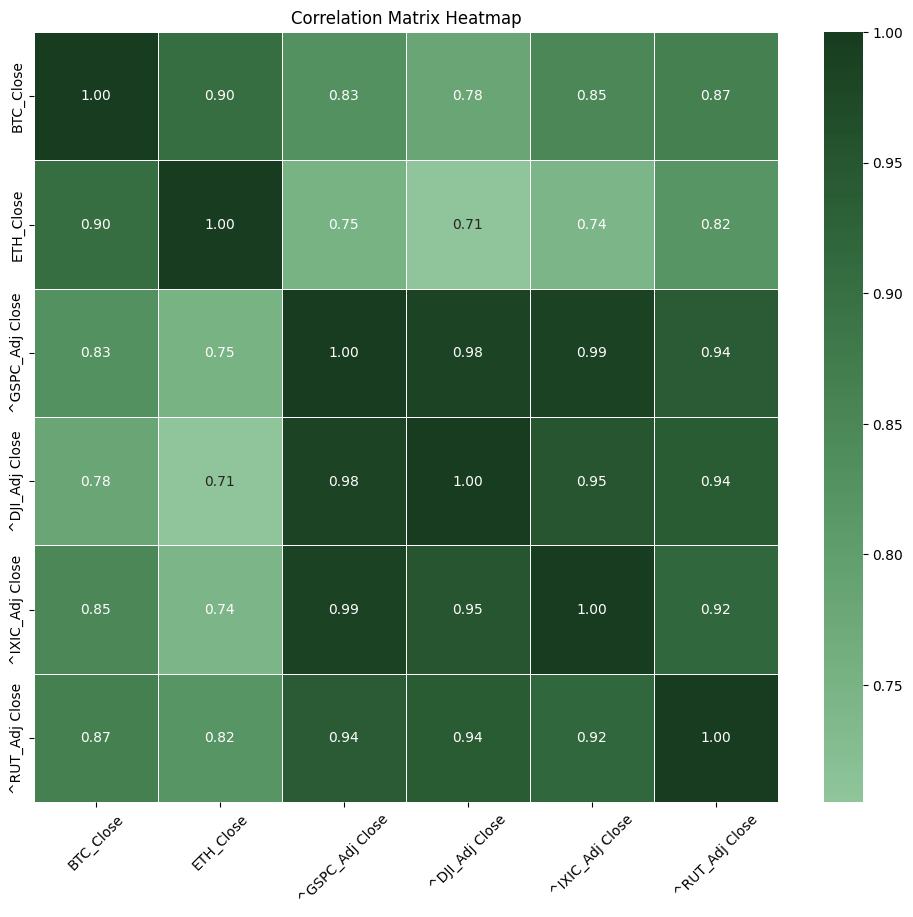

In [203]:
# @title Analysis - Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cols = merged_df.columns.tolist()

new_cols = ['BTC_Close', 'ETH_Close', '^GSPC_Adj Close', '^DJI_Adj Close', '^IXIC_Adj Close', '^RUT_Adj Close']

df = merged_df[new_cols]

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

color_map = sns.cubehelix_palette(start=2, rot=0, dark=0.18, light=.69, reverse=False, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=color_map, fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

The above shows fairly high correlation all around.

Correlation between BTC and stock indicators ranges from .782-.865.

Stock indicators' correlations among themselves range from .917-.987.

ETH correlation with stock indicators ranges from .71-.82.

BTC to ETH correlation is .9.

Notes:
- The correlation matrix above was generated using the merged dataframe which contains NaNs for approximately the first 800 rows of Ethereum data due to Ethereum's later launch date. The .corr() method handles these NaNs automatically and they do not affect results in any way.

In [204]:
# @title Write df to .csv
df.to_csv('df.csv', index=True)

In [205]:
# @title Dynamic Visual of Each Variable's Performance Over Time
import plotly.express as px
# Consulted Plotly documentation. They have lots of examples!

# Use Date as an Attribute Again
df = merged_df.reset_index()
date_cols = ['Date'] + new_cols
df = df[date_cols]

fig = px.line(df, x='Date', y=['BTC_Close', 'ETH_Close', '^GSPC_Adj Close', '^DJI_Adj Close', '^IXIC_Adj Close', '^RUT_Adj Close'])
fig.show()

In [206]:
# @title Natural Logarithmic Transformation

# This is to normalize the data, compress the scale, while preserving the multiplicative relationships in the data
# natural log is used to efficiently interpret in terms of percentage changes since we are dealing with growth rates / proportional changes

log_df = df.copy()
log_df[new_cols] = np.log(df[new_cols])

fig = px.line(log_df, x='Date', y=['BTC_Close', 'ETH_Close', '^GSPC_Adj Close', '^DJI_Adj Close', '^IXIC_Adj Close', '^RUT_Adj Close'])
fig.show()

In [207]:
# @title Save log_df to .csv
log_df.to_csv('log_data.csv', index=True)

In [208]:
# @title Ordinary Least Squares Regression
import statsmodels.api as sm

dependent_variable = 'BTC_Close'
independent_variables = ['^GSPC_Adj Close', '^DJI_Adj Close', '^IXIC_Adj Close', '^RUT_Adj Close']

X = sm.add_constant(df[independent_variables])

y = df[dependent_variable]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              BTC_Close   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3646.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                -29506.
No. Observations:                2991   AIC:                         5.902e+04
Df Residuals:                    2986   BIC:                         5.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.852e+04   1075.188    -

In [209]:
# @title
dependent_variable = 'BTC_Close'
independent_variables = ['^GSPC_Adj Close']

X = sm.add_constant(df[independent_variables])

y = df[dependent_variable]

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              BTC_Close   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     6598.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                -30414.
No. Observations:                2991   AIC:                         6.083e+04
Df Residuals:                    2989   BIC:                         6.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.075e+04    475.432    -

In [210]:
# @title
dependent_variable = 'BTC_Close'
independent_variables = ['^DJI_Adj Close']

X = sm.add_constant(df[independent_variables])

y = df[dependent_variable]

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              BTC_Close   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     4718.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                -30740.
No. Observations:                2991   AIC:                         6.148e+04
Df Residuals:                    2989   BIC:                         6.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.081e+04    561.229    -54.

In [211]:
# @title
dependent_variable = 'BTC_Close'
independent_variables = ['^IXIC_Adj Close']

X = sm.add_constant(df[independent_variables])

y = df[dependent_variable]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              BTC_Close   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     7871.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                -30227.
No. Observations:                2991   AIC:                         6.046e+04
Df Residuals:                    2989   BIC:                         6.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.751e+04    293.770    -

In [212]:
# @title
dependent_variable = 'BTC_Close'
independent_variables = '^RUT_Adj Close'

X = sm.add_constant(df[independent_variables])

y = df[dependent_variable]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              BTC_Close   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     8898.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                -30092.
No. Observations:                2991   AIC:                         6.019e+04
Df Residuals:                    2989   BIC:                         6.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.867e+04    492.169    -78.

**Compare these three plots:**

In [213]:
# @title BTC and S&P 500 Time Series Plot
plt.figure(figsize=(8, 6))

color_map = sns.cubehelix_palette(start=2, rot=0, dark=0.18, light=.69, reverse=False, as_cmap=True)

# Use Date as an attribute again
df = merged_df.reset_index()
date_cols = ['Date'] + new_cols
df = df[date_cols]

fig = px.line(df, x='Date', y=['BTC_Close','^GSPC_Adj Close'])
fig.show()

<Figure size 800x600 with 0 Axes>

Above we have valuations in USD of BTC and the S&P 500 over time. GSPC increases steadily while BTC is subject to high variation, yet increases massively overall.

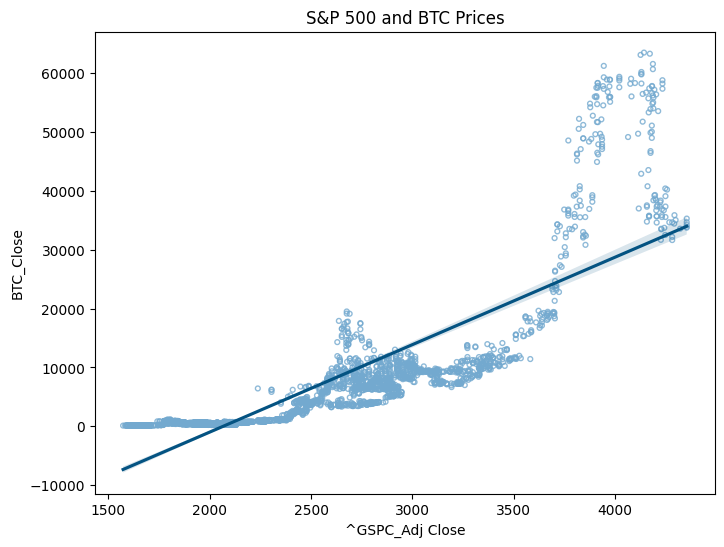

In [214]:
# @title S&P 500 and BTC Prices RegPlot

# This plots the values of BTC against the values of S&P 500. Details in Final Report.

plt.figure(figsize=(8, 6))

color_map = sns.cubehelix_palette(start=2, rot=0, dark=0.18, light=.69, reverse=False, as_cmap=True)

sns.regplot(data=df, x='^GSPC_Adj Close', y='BTC_Close', scatter_kws={'s': 12, 'color':sns.color_palette('PuBu', n_colors=1)[0], 'marker':'o', 'alpha': 0.8, "facecolors": 'none', "edgecolors": sns.color_palette('PuBu', n_colors=1)[0]}, line_kws={'color': sns.color_palette('PuBu', n_colors=9)[8]})

plt.title('S&P 500 and BTC Prices')
plt.show()

This next graph (above) plots the relationship between GSPC and BTC valuations. Since the S&P 500 has increased steadily over time, increased values of the GSPC on the X-axis are generally equivalent to later points in time and the graph is mostly stable. This is why the trend of BTC values on this plot is strikingly similar to the trend shown in the first plot.

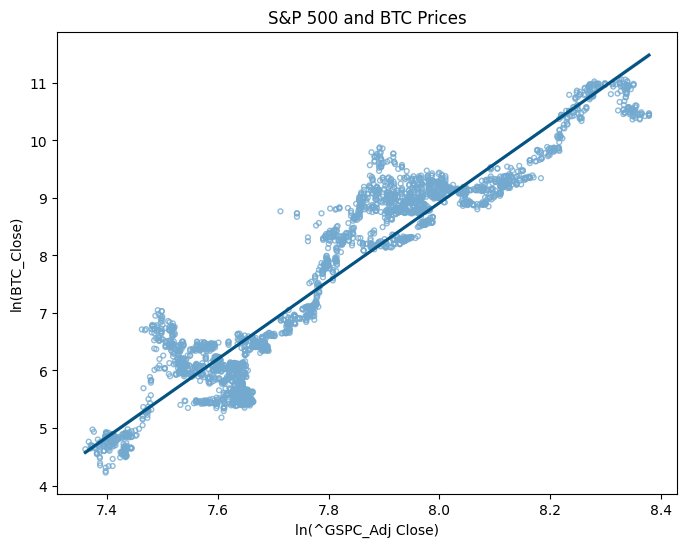

In [215]:
# @title Normalized S&P 500 and BTC Prices RegPlot

# This plots the normalized values (post-logarithmic (base e) transformation) against each other to more accurately compare performance trends rather than valuation

plt.figure(figsize=(8, 6))

color_map = sns.cubehelix_palette(start=2, rot=0, dark=0.18, light=.69, reverse=False, as_cmap=True)

sns.regplot(data=log_df, x='^GSPC_Adj Close', y='BTC_Close', scatter_kws={'s': 12, 'color':sns.color_palette('PuBu', n_colors=1)[0], 'marker':'o', 'alpha': 0.8, "facecolors": 'none', "edgecolors": sns.color_palette('PuBu', n_colors=1)[0]}, line_kws={'color': sns.color_palette('PuBu', n_colors=9)[8]})

plt.title('S&P 500 and BTC Prices')
plt.xlabel('ln(^GSPC_Adj Close)')
plt.ylabel('ln(BTC_Close)')
plt.show()

Plotting the natural logarithm values of GSPC and BTC against each other reveals a helix formation. In the plot, values of ln(BTC) are increasing and decreasing on a fairly regular interval with respect to ln(GSPC).

From this information, we can interpret the following:

- The helix formation on this graph is a visual representation of the volatility of Bitcoin with respect to US stock market indicators (specifically the S&P 500).

- The regularity (symmetry) of the helix shows that this volatility occurs in roughly equal parts positive and negative.

- The upward trend shows that while the rate of change of Bitcoin may swing dramatically between positive and negative, overall there is substantial growth not only in the valuation of Bitcoin, but in the rate at which this valuation is increasing.

- Finally, the helix formation of BTC values indicates the presence of cyclic behavior.

To further investigate this, let's plot the normalized values of both Bitcoin and the S&P 500 over time below.

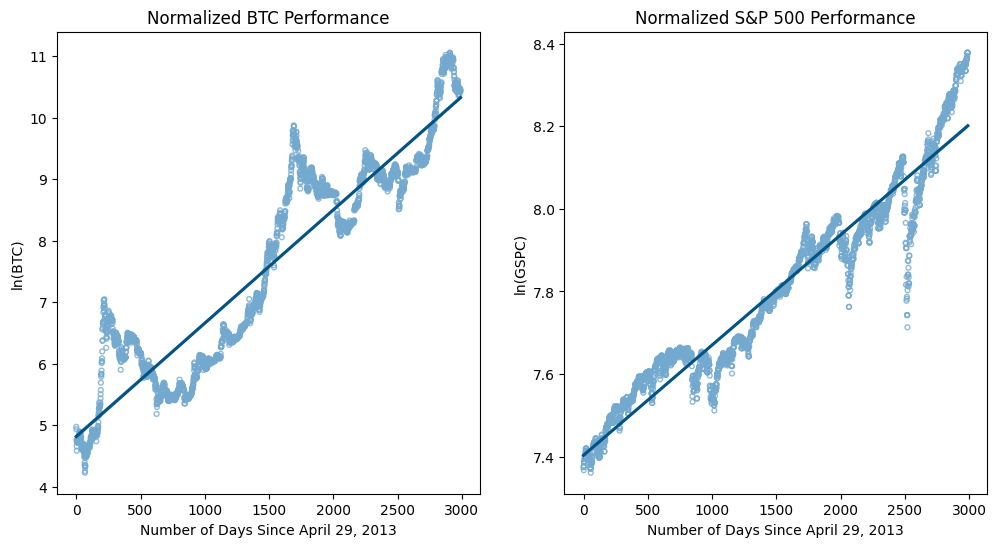

<Figure size 800x600 with 0 Axes>

In [216]:
# @title Normalized BTC and GSPC Prices RegPlots

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.figure(figsize=(8, 6))

color_map = sns.cubehelix_palette(start=2, rot=0, dark=0.18, light=.69, reverse=False, as_cmap=True)

# Convert 'Date' to numeric values
log_df['NumericDate'] = (log_df['Date'] - log_df['Date'].min()).dt.days

sns.regplot(
    data=log_df,
    x='NumericDate',  # Use the numeric representation of the date
    y='BTC_Close',
    scatter_kws={'s': 12, 'color': sns.color_palette('PuBu', n_colors=1)[0], 'marker': 'o', 'alpha': 0.8, "facecolors": 'none', "edgecolors": sns.color_palette('PuBu', n_colors=1)[0]},
    line_kws={'color': sns.color_palette('PuBu', n_colors=9)[8]},
    ax=axes[0]
)
axes[0].set_title('Normalized BTC Performance')
axes[0].set_xlabel('Number of Days Since April 29, 2013')
axes[0].set_ylabel('ln(BTC)')

sns.regplot(
    data=log_df,
    x='NumericDate',  # Use the numeric representation of the date
    y='^GSPC_Adj Close',
    scatter_kws={'s': 12, 'color': sns.color_palette('PuBu', n_colors=1)[0], 'marker': 'o', 'alpha': 0.8, "facecolors": 'none', "edgecolors": sns.color_palette('PuBu', n_colors=1)[0]},
    line_kws={'color': sns.color_palette('PuBu', n_colors=9)[8]},
    ax=axes[1]
)
axes[1].set_title('Normalized S&P 500 Performance')
axes[1].set_xlabel('Number of Days Since April 29, 2013')
axes[1].set_ylabel('ln(GSPC)')

plt.tight_layout()
plt.show()


This revealed similar trends in the two over the same time interval, with the primary difference being higher volatility of Bitcoin. Both variables appear to display cyclical patterns, which indicate that future prices can be predicted based on current and past trends.

In [217]:
# @title Durbin-Watson Test for All Variables
from statsmodels.stats.stattools import durbin_watson
# Statistical test for autocorrelation (Durbin-Watson test)
btc_durbin_watson_stat = durbin_watson(df['BTC_Close'])
print(f'BTC Durbin-Watson Statistic: {btc_durbin_watson_stat}')

eth_durbin_watson_stat = durbin_watson(eth_df['ETH_Close'])
print(f'ETH Durbin-Watson Statistic: {eth_durbin_watson_stat}')

sp_durbin_watson_stat = durbin_watson(df['^GSPC_Adj Close'])
print(f'S&P 500 Durbin-Watson Statistic: {sp_durbin_watson_stat}')

dow_durbin_watson_stat = durbin_watson(df['^DJI_Adj Close'])
print(f'DOW Jones Durbin-Watson Statistic: {dow_durbin_watson_stat}')

russ_durbin_watson_stat = durbin_watson(df['^RUT_Adj Close'])
print(f'Russell 2000 Durbin-Watson Statistic: {russ_durbin_watson_stat}')

nas_durbin_watson_stat = durbin_watson(df['^IXIC_Adj Close'])
print(f'NASDAQ Durbin-Watson Statistic: {nas_durbin_watson_stat}')

BTC Durbin-Watson Statistic: 0.002003596763472896
ETH Durbin-Watson Statistic: 0.004645223455365408
S&P 500 Durbin-Watson Statistic: 8.354878156391205e-05
DOW Jones Durbin-Watson Statistic: 8.733897194399806e-05
Russell 2000 Durbin-Watson Statistic: 0.0001200397540489071
NASDAQ Durbin-Watson Statistic: 0.00012066196464265207


As shown, Durbin-Watson Statistics for all variables are remarkably close to 0. This is a indicator of high autocorrelation (more in Final Report).

In [218]:
# @title Write requirements.txt
!pip freeze >> requirements.txt